In [78]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
from variational_auto_encoder import VariationalAutoEncoder
from stacked_mnist import StackedMNISTData, DataMode
import numpy as np
import matplotlib.pyplot as plt
from verification_net import VerificationNet
from utils import display_images

In [80]:
variational_auto_encoder = VariationalAutoEncoder(latent_dim=8)
variational_auto_encoder.model.summary()

Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_69 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 conv2d_70 (Conv2D)          (None, 6, 6, 48)          13872     
                                                                 
 conv2d_71 (Conv2D)          (None, 2, 2, 64)          27712     
                                                                 
 flatten_35 (Flatten)        (None, 256)               0         
                                                                 
 dense_46 (Dense)            (None, 16)                4112      
                                                                 
 independent_normal_12 (Inde  ((None, 8),              0  

In [81]:
variational_auto_encoder.train(force_relearn=True)

./models/vae
Epoch 1/10
Cause: could not parse the source code of <function VariationalAutoEncoder.__init__.<locals>.<lambda> at 0x7f863a19dee0>: no matching AST found among candidates:
# coding=utf-8
(lambda input, output: (- output.log_prob(input)))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function VariationalAutoEncoder.__init__.<locals>.<lambda> at 0x7f863a19dee0>: no matching AST found among candidates:
# coding=utf-8
(lambda input, output: (- output.log_prob(input)))
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - 38s 78ms/step - loss: 198.9607 - val_loss: 155.3869
Epoch 2/10
469/469 [==============================] - 37s 79ms/step - loss: 151.0891 - val_loss: 146.7331
Epoch 3/10
469/469 [==============================] - 35s 75ms/step - loss: 145.5964 - val_loss: 142.6609
Epoch 4/10
469/469 [=====

# Mono Images

In [82]:
generator = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)

### Reconstruction results

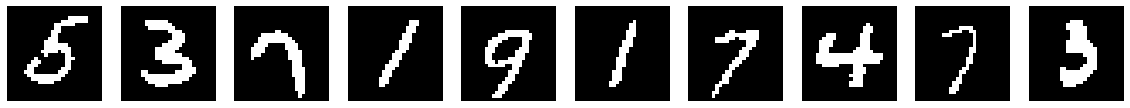

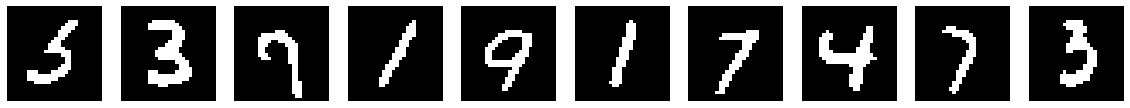

In [83]:
reconstructed = variational_auto_encoder.reconstruct(x_test)

display_images(x_test, 10)
display_images(reconstructed, 10)

In [84]:
net = VerificationNet(force_learn=False, file_name="../models/verification_model")
_, acc_ae = net.check_predictability(data=reconstructed, correct_labels=y_test)
print(f"Accuracy of Reconstruction: {100 * acc_ae:.2f}%")


/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Accuracy of Reconstruction: 82.65%


### Autoencoder as a generator

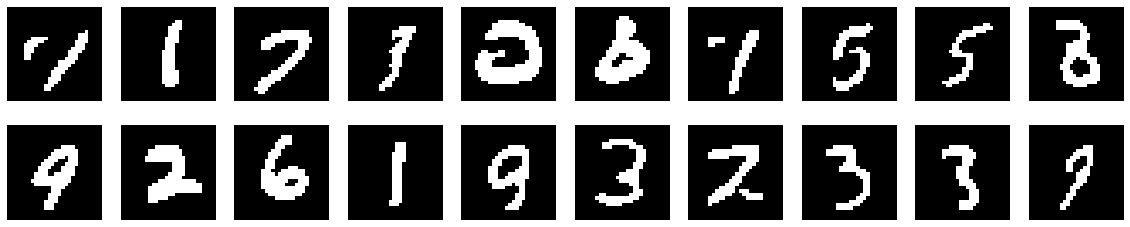

In [85]:
generated = variational_auto_encoder.generate_new_samples()
display_images(generated, 20)

In [86]:
cov = net.check_class_coverage(data=generated, tolerance=0.98)
pred, _ = net.check_predictability(data=generated)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")

Coverage: 100.00%
Predictability: 83.10%


# Color Images

In [97]:
generator = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=10000)
x_test = x_test.astype(np.float64)

### Reconstruction results

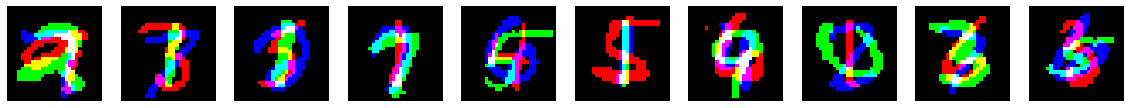

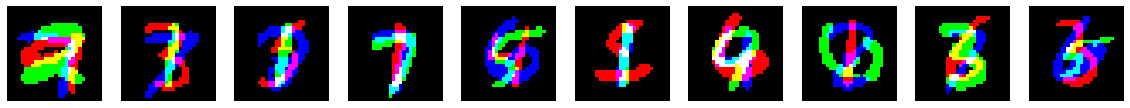

In [98]:
reconstructed = variational_auto_encoder.reconstruct(x_test)

display_images(x_test, 10, color=True)
display_images(reconstructed, 10, color=True)

In [100]:
net = VerificationNet(force_learn=False, file_name="../models/verification_model")
_, acc_ae = net.check_predictability(data=reconstructed, correct_labels=y_test, tolerance=0.5)
_, acc_or = net.check_predictability(data=x_test, correct_labels=y_test, tolerance=0.5)
print(f"Accuracy of Reconstruction: {100 * acc_ae:.2f}%")

Accuracy of Reconstruction: 61.77%


### Variational-Auto-Encoder as a generator

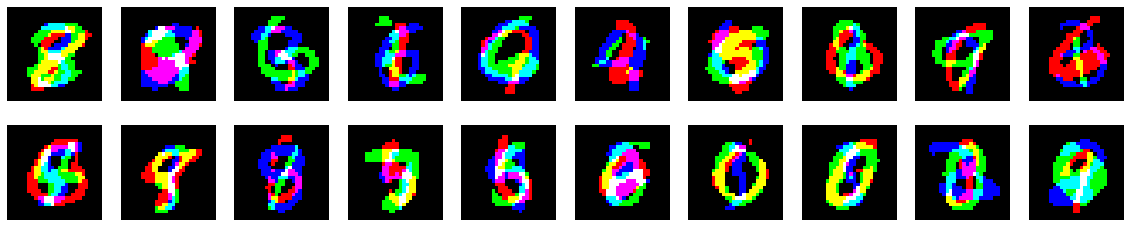

In [48]:
generated = variational_auto_encoder.generate_new_samples(no_channels=3)
display_images(generated, 20, color=True)

In [49]:
cov = net.check_class_coverage(data=generated, tolerance=0.98)
pred, _ = net.check_predictability(data=generated)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")

Coverage: 16.10%
Predictability: 44.30%


# Variational-Auto-Encoder as anomaly detector

In [60]:
vae_anomaly = VariationalAutoEncoder(latent_dim=8, missing=True)
vae_anomaly.train(force_relearn=False)

./models/vae_missing
Read model from file, so I do not retrain


### Mono images

IndexError: index 10 is out of bounds for axis 0 with size 10

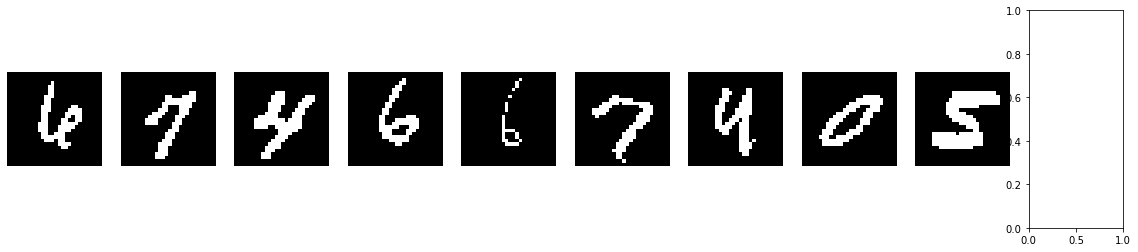

In [53]:
generator = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)

anomalies = vae_anomaly.get_anomalies(x_test)
display_images(x_test[anomalies], 10)

### Color images

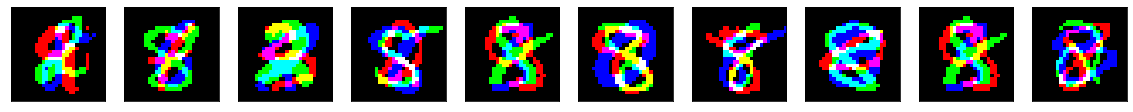

In [ ]:
generator = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)
x_test = x_test.astype(np.float64)

anomalies = vae_anomaly.get_anomalies(x_test, k=10, N=1000)
display_images(x_test[anomalies], 10, color=True)